<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Dic1-2/clasificacion_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal para clasificación de números
Por Isaías Hernández Lares | ML2023

Importamos las bibliotecas

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Dropout, Flatten
from keras.optimizers import Adam
from keras import regularizers

# Cargando los datos

In [7]:
df = pd.read_csv('/content/drive/MyDrive/ML2023/train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [9]:
#Para filtrar solo los 0's y 1's
df01 = df[(df.label==1) | (df.label==0)]
arr = np.array(df01)


Generando los arreglos de datos

In [10]:
temp = np.array(df)
X = temp[:, 1:]
Y = temp[:, 0]
X.shape, Y.shape

((42000, 784), (42000,))

Ploteando algunas imágenes

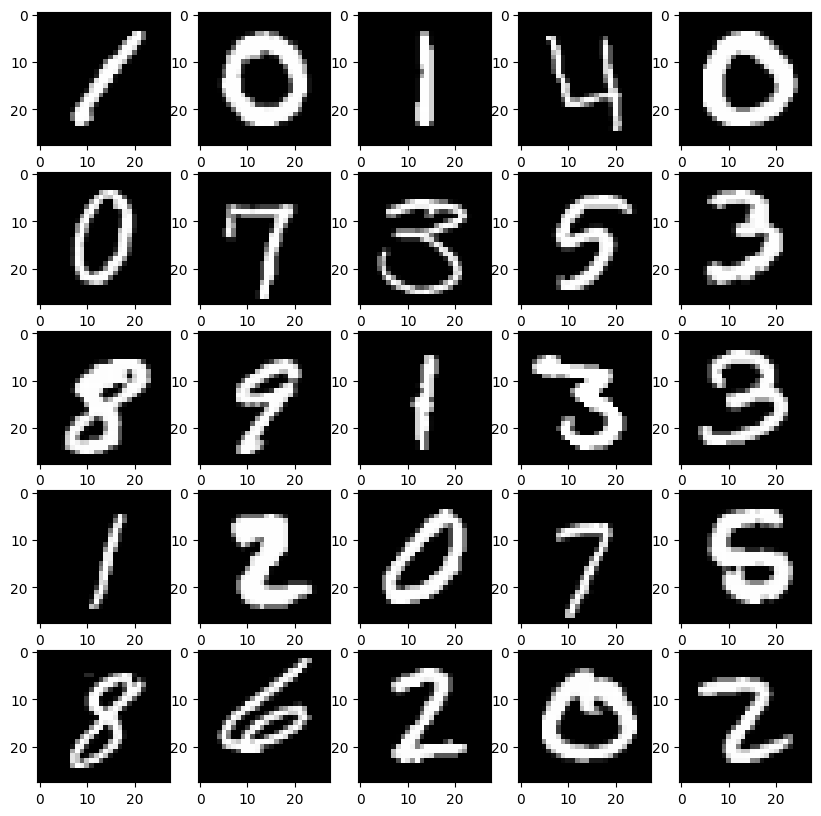

In [11]:
arr2 = X.T.reshape(28, 28, 42000)

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
j, k = 0, 0
n = 5
for i in range(n*n):
    ax[j, k].imshow(arr2[:,:,i], cmap="Greys_r")
    k += 1
    if k%n == 0:
        k = 0
        j += 1

# Modelo de Keras


Separamos el dataset en test y train

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.10, random_state=42,shuffle= True)
x_train.shape

(37800, 784)

## Definición de la primera arquitectura de red neuronal

Definimos una forma arbitraria de la arquitectura

In [25]:
tf.random.set_seed(1)
model = Sequential([tf.keras.Input(shape=(x_train.shape[1],))])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.add(Dense(64, activation = "relu", name="layer_1"))
model.add(layers.Dense(10, activation="softmax", name="layer_final"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 64)                50240     
                                                                 
 layer_final (Dense)         (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Entrenamiento del modelo 1

Especificamos las configuraciones del entrenamiento(optimizer, loss, metrics):



In [27]:
model.compile(
  optimizer = "sgd",
  loss = keras.losses.SparseCategoricalCrossentropy(),
  metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

Llamamos fit() para entrenar el modelo. Utiliza batches para iterar para utilizar durante el entrenamiento.


In [28]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_split = 0.1
)

Fit model on training data
Epoch 1/10
532/532 [==============================] - 3s 5ms/step - loss: 50.5282 - sparse_categorical_accuracy: 0.1111 - val_loss: 2.2998 - val_sparse_categorical_accuracy: 0.1143
Epoch 2/10
532/532 [==============================] - 2s 5ms/step - loss: 2.3093 - sparse_categorical_accuracy: 0.1163 - val_loss: 2.2954 - val_sparse_categorical_accuracy: 0.1159
Epoch 3/10
532/532 [==============================] - 2s 3ms/step - loss: 2.2885 - sparse_categorical_accuracy: 0.1202 - val_loss: 2.3009 - val_sparse_categorical_accuracy: 0.1130
Epoch 4/10
532/532 [==============================] - 2s 3ms/step - loss: 2.3010 - sparse_categorical_accuracy: 0.1115 - val_loss: 2.3009 - val_sparse_categorical_accuracy: 0.1130
Epoch 5/10
532/532 [==============================] - 2s 3ms/step - loss: 2.3010 - sparse_categorical_accuracy: 0.1115 - val_loss: 2.3010 - val_sparse_categorical_accuracy: 0.1130
Epoch 6/10
532/532 [==============================] - 2s 3ms/step - loss

Evaluación del modelo


In [29]:
print("Evaluar en test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluar en test data
33/33 [==============================] - 0s 2ms/step - loss: 2.2997 - sparse_categorical_accuracy: 0.1124
test loss, test acc: [2.299682140350342, 0.11238095164299011]


La presición es malísima. Tenemos que mejorar los hiperparametros.

Consideramos que un buen valor de la función costo en 0.3. En este caso tenemos ~2.3 de la función costo para el entrenamiento y validación. Tenemos $J_{dev}$ y $J_{val}$ altos, es decir, tenemos porblema de bias. Proponemos aumentar la cantidad de capas y neuronas para mejorar la función costo.

## Segunda Arquitectura

Añadimos una capa y un dropout para regularización

In [30]:
model2 = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_split=0.1
)

# Evaluar en datos de prueba
results = model.evaluate(x_test, y_test, batch_size=128)
print("Test loss, test accuracy:", results)

Epoch 1/15
532/532 [==============================] - 3s 4ms/step - loss: 2.3010 - accuracy: 0.1147 - val_loss: 2.3285 - val_accuracy: 0.1275
Epoch 2/15
532/532 [==============================] - 2s 4ms/step - loss: 2.1986 - accuracy: 0.1731 - val_loss: 2.1100 - val_accuracy: 0.1995
Epoch 3/15
532/532 [==============================] - 3s 5ms/step - loss: 2.0739 - accuracy: 0.2154 - val_loss: 2.0522 - val_accuracy: 0.2389
Epoch 4/15
532/532 [==============================] - 3s 5ms/step - loss: 1.9813 - accuracy: 0.2471 - val_loss: 1.9423 - val_accuracy: 0.2735
Epoch 5/15
532/532 [==============================] - 2s 4ms/step - loss: 1.8369 - accuracy: 0.2957 - val_loss: 1.7482 - val_accuracy: 0.3198
Epoch 6/15
532/532 [==============================] - 2s 3ms/step - loss: 1.7184 - accuracy: 0.3221 - val_loss: 1.6646 - val_accuracy: 0.3471
Epoch 7/15
532/532 [==============================] - 2s 3ms/step - loss: 1.6619 - accuracy: 0.3328 - val_loss: 1.6330 - val_accuracy: 0.3259
Epoch 

La presición ha mejorado, pero aún falta más para llegar al valor 0.3.

Variamos la cantidad de neuronas para generar la curva de aprendizaje. Obtenemos la siguiente gráfica.

Text(0, 0.5, 'loss_test')

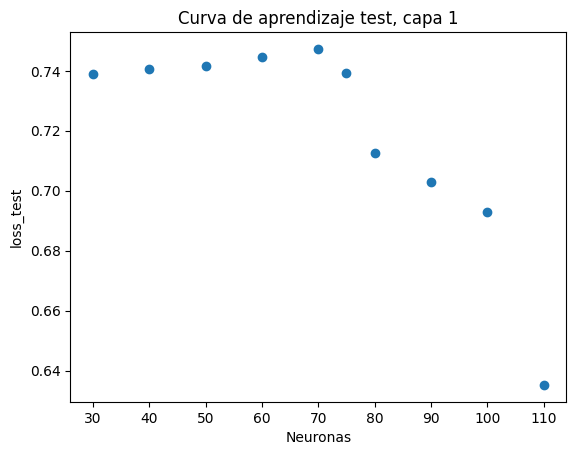

In [48]:
loss = [0.7390, 0.7407, 0.7416, 0.7445, 0.7473, 0.7126, 0.7030, 0.6930, 0.6352, 0.7392]
neuronas = [30, 40, 50, 60, 70, 80, 90, 100, 110, 75]
plt.scatter(neuronas, loss)
plt.title("Curva de aprendizaje test, capa 1")
plt.xlabel("Neuronas")
plt.ylabel("loss_test")

Determinamos que es mejor tener 70 neuronas en la primera capa. Repetimos el mismo proceso para la segunda capa.

In [ ]:
model2 = Sequential([
    Dense(70, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.1
)

# Evaluar en datos de prueba
results = model.evaluate(x_test, y_test, batch_size=128)
print("Test loss, test accuracy:", results)

Epoch 1/10
532/532 [==============================] - 3s 4ms/step - loss: 0.7544 - accuracy: 0.7713 - val_loss: 0.8123 - val_accuracy: 0.7746
Epoch 2/10
532/532 [==============================] - 2s 4ms/step - loss: 0.7469 - accuracy: 0.7741 - val_loss: 0.8359 - val_accuracy: 0.7487
Epoch 3/10
532/532 [==============================] - 4s 7ms/step - loss: 0.7477 - accuracy: 0.7760 - val_loss: 0.8240 - val_accuracy: 0.7741
Epoch 4/10
532/532 [==============================] - 3s 6ms/step - loss: 0.7509 - accuracy: 0.7735 - val_loss: 0.8387 - val_accuracy: 0.7611
Epoch 5/10
532/532 [==============================] - 3s 6ms/step - loss: 0.7501 - accuracy: 0.7740 - val_loss: 0.8180 - val_accuracy: 0.7680
Epoch 6/10
532/532 [==============================] - 2s 5ms/step - loss: 0.7476 - accuracy: 0.7755 - val_loss: 0.8269 - val_accuracy: 0.7685
Epoch 7/10
532/532 [==============================] - 2s 3ms/step - loss: 0.7515 - accuracy: 0.7726 - val_loss: 0.8303 - val_accuracy: 0.7712
Epoch 

In [ ]:
loss = [0.7402, ]
neuronas = [60, 50, ]
plt.scatter(neuronas, loss)
plt.title("Curva de aprendizaje test, capa 2")
plt.xlabel("Neuronas")
plt.ylabel("loss_test")

In [19]:
# Crear el modelo
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),  # Capa de Dropout para regularización
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.3),  # Capa de Dropout para regularización
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_split=0.1
)

# Evaluar en datos de prueba
results = model.evaluate(x_test, y_test, batch_size=128)
print("Test loss, test accuracy:", results)

Epoch 1/15
532/532 [==============================] - 4s 6ms/step - loss: 5.7547 - accuracy: 0.5174 - val_loss: 1.2052 - val_accuracy: 0.7500
Epoch 2/15
532/532 [==============================] - 3s 6ms/step - loss: 1.4292 - accuracy: 0.6617 - val_loss: 0.9810 - val_accuracy: 0.8257
Epoch 3/15
532/532 [==============================] - 3s 6ms/step - loss: 1.1683 - accuracy: 0.7349 - val_loss: 0.7623 - val_accuracy: 0.8754
Epoch 4/15
532/532 [==============================] - 5s 9ms/step - loss: 1.0022 - accuracy: 0.7760 - val_loss: 0.6492 - val_accuracy: 0.9000
Epoch 5/15
532/532 [==============================] - 4s 8ms/step - loss: 0.8563 - accuracy: 0.8179 - val_loss: 0.5933 - val_accuracy: 0.9093
Epoch 6/15
532/532 [==============================] - 3s 7ms/step - loss: 0.7647 - accuracy: 0.8361 - val_loss: 0.5268 - val_accuracy: 0.9196
Epoch 7/15
532/532 [==============================] - 3s 5ms/step - loss: 0.6950 - accuracy: 0.8518 - val_loss: 0.4924 - val_accuracy: 0.9270
Epoch 

In [19]:
.941190481185913